In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

## Seems like the Reddit trend caught up on Twitter too

In [2]:
spy = pd.read_csv("C:\\Users\\user\\datasets\\birds_arent_real_tweets.csv")
spy

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1472051709400817665,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-18 03:50:51,More soon. We are obviously not happy about th...,NaN,Twitter for iPhone,4,90,False
1,1471634334717288452,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-17 00:12:21,@Ry_Too_D2 @ClickHole Really one of the only j...,NaN,Twitter for iPhone,0,1,False
2,1471633095799545856,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-17 00:07:26,@NyTulsi Distorting.,NaN,Twitter for iPhone,0,0,False
3,1471632068761243655,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-17 00:03:21,@NyTulsi We try not to curse but I understand ...,NaN,Twitter for iPhone,0,5,False
4,1471632012935053333,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-17 00:03:08,@ReinsPhoenix Stay safe.,NaN,Twitter for iPhone,0,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1472451184258605057,natefizzle,"Maryland, USA",I've been on Twitter since November 2008. I oc...,2008-11-12 03:58:24,92,109,40,False,2021-12-19 06:18:13,Birds think we're robots because they are robo...,['birdsarentreal'],Twitter Web App,0,0,False
748,1472403687888896011,3 Libras Magdelena,"The South, USA","I’m boring, not edgy. Detest hypocrisy & group...",2016-04-04 22:46:36,3895,5000,460719,False,2021-12-19 03:09:29,@chris_notcapn I think that they should've sta...,NaN,Twitter for iPhone,0,0,False
749,1472382526169788417,paige ✌🏼,#973,i'm the bird lady from Home Alone,2009-04-30 02:17:07,344,1376,7601,False,2021-12-19 01:45:24,birthday butter bird \n#birdsarentreal https:/...,['birdsarentreal'],Twitter for iPhone,0,7,False
750,1472337734425530370,Randall McCorquodale,East Coast USA,Life/Liberty/Pursuit of Happiness🌞Do Unto Othe...,2013-03-27 03:03:28,4249,3856,4653,False,2021-12-18 22:47:25,The Goose of Luminescent Glory cock's head to ...,"['Canadian', 'CanadianGeeseofTwitter']",Twitter Web App,2,20,False


In [3]:
spy[spy['user_name'].duplicated()].sort_values('user_name')

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
594,1471456621003956225,Abby Libby,🇺🇸🇺🇸🇺🇸,"Conservative, Firefighter's Wife, Works with c...",2019-01-17 21:14:36,6085,447,79053,False,2021-12-16 12:26:11,All early birds are feds because birds aren't ...,['birdsarentreal'],Twitter for Android,3,41,False
396,1469381770713841665,Achena Bhromon,"Basirhat, India",Birder and Traveller. All pictures are taken b...,2019-03-13 13:56:11,322,480,394,False,2021-12-10 19:01:28,Collared Falconet https://t.co/tjTJBegljE via ...,"['birdsarentreal', 'birdphotography', 'bird', ...",Twitter Web App,1,3,False
316,1469550245662973955,Achena Bhromon,"Basirhat, India",Birder and Traveller. All pictures are taken b...,2019-03-13 13:56:11,322,480,394,False,2021-12-11 06:10:56,Blue-Throated Barbet\n#birds #birdsarentreal #...,"['birds', 'birdsarentreal', 'birdwatching', 'B...",Twitter for Android,3,12,False
214,1469983241301987328,Achena Bhromon,"Basirhat, India",Birder and Traveller. All pictures are taken b...,2019-03-13 13:56:11,322,480,394,False,2021-12-12 10:51:30,Large Hawk Cuckoo\n#bird #birdwatching #birdsa...,"['bird', 'birdwatching', 'birdsarentreal', 'Bi...",Twitter for Android,1,3,False
467,1469274492765491203,Aht Sao,"Hinckley, MN",Purveyor of common sense and loving life’s nua...,2017-08-26 12:32:27,5,77,495,False,2021-12-10 11:55:11,@laurenboebert @RepMTG @IlhanMN @RepAOC Per Bi...,['birdsarentreal'],Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1469426795451760644,thaumologist | 🧙‍♂️ | New Model 2021-12-18,Wales,18+ only | Level 30 Arch-Wizard\n#vTuber - I p...,2009-03-15 22:19:04,259,302,7587,False,2021-12-10 22:00:23,"And we're done! Thank you all for turning up, ...",NaN,Twitter Web App,1,11,False
384,1469389405664260102,thaumologist | 🧙‍♂️ | New Model 2021-12-18,Wales,18+ only | Level 30 Arch-Wizard\n#vTuber - I p...,2009-03-15 22:19:04,259,302,7587,False,2021-12-10 19:31:48,"🦜 Back to my bird-based shenanigans, once agai...",NaN,Twitter Web App,4,5,False
628,1471096480115175427,⚓Elaine💙,"Boston, Ventura, CT, Buffalo",~HOLDFAST~ 💕r of all 🐾🐾 🏳️‍🌈 ally #BLM \n#Resi...,2011-10-25 12:22:21,1322,1055,1265,False,2021-12-15 12:35:07,@NYTNational @CarolYMorrisse1 #birdsarentreal ...,['birdsarentreal'],Twitter for Android,0,1,False
206,1470044260561002498,𝐖𝐢𝐥𝐥𝐢𝐚𝐦 𝐇𝐮𝐛𝐛𝐚𝐫𝐝,"Washington, DC",| @BetheMatch | @TogetherWeRise | @MWDRescue |...,2014-02-12 20:33:22,1534,100,3172,False,2021-12-12 14:53:58,The truth comes out!! #birdsarentreal https://...,['birdsarentreal'],Twitter Web App,0,0,False


In [4]:
minus_duplicate=spy.drop_duplicates(subset =["user_name"])
minus_duplicate

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1472051709400817665,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-18 03:50:51,More soon. We are obviously not happy about th...,NaN,Twitter for iPhone,4,90,False
68,1472050893751308293,Hannah T,NaN,"MS, LAT, ATC ••• North Polars",2013-03-15 05:08:31,61,149,737,False,2021-12-18 03:47:37,Learning so much #birdsarentreal https://t.co/...,['birdsarentreal'],Twitter for iPhone,0,0,False
69,1470900893574787072,Georgie Debusschere,"Gold Coast, Queensland",Foot in mouth therapy. Red flags & red tape ✂️...,2021-04-16 13:19:15,9,72,244,False,2021-12-14 23:37:55,"It’s cool Kevin, I don’t even care how much yo...",['birdsarentreal'],Twitter for iPhone,0,0,False
70,1470896814320619521,Kyle Thorne👨🏻‍💻,Fortress of Solitude,"Father Husband Friend. Into: Comic Books, LEGO...",2011-09-19 05:30:28,79,527,2120,False,2021-12-14 23:21:43,"Right then, I am carrying Alka-Seltzer in my p...",NaN,Twitter for iPad,0,0,False
71,1470890741417324546,Matthias Geining,Wetterau,Pirat und Mensch,2010-12-16 18:18:18,272,283,26,False,2021-12-14 22:57:35,"From The New York Times:\n\nBirds Aren’t Real,...",NaN,Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1472465642821341186,Kiki | DTIYS PINNED,California,Digital Artist | KidLit Writer | Pronouns: The...,2020-12-04 17:38:25,393,735,10227,False,2021-12-19 07:15:40,I'm gonna make up a whole new conspiracy. But ...,['birdsarentreal'],Twitter for Android,0,2,False
746,1472451996968157186,Maram (the only real elf in Kansai),"Hyogo-ken, Japan",I like to collect berries and to kick orcs' ass,2016-05-02 19:28:33,1491,1164,216222,False,2021-12-19 06:21:27,@dreadconquest seems like they don't want us t...,['birdsarentreal'],Twitter for Android,0,2,False
747,1472451184258605057,natefizzle,"Maryland, USA",I've been on Twitter since November 2008. I oc...,2008-11-12 03:58:24,92,109,40,False,2021-12-19 06:18:13,Birds think we're robots because they are robo...,['birdsarentreal'],Twitter Web App,0,0,False
748,1472403687888896011,3 Libras Magdelena,"The South, USA","I’m boring, not edgy. Detest hypocrisy & group...",2016-04-04 22:46:36,3895,5000,460719,False,2021-12-19 03:09:29,@chris_notcapn I think that they should've sta...,NaN,Twitter for iPhone,0,0,False


# How about we check their usernames

(-0.5, 399.5, 199.5, -0.5)

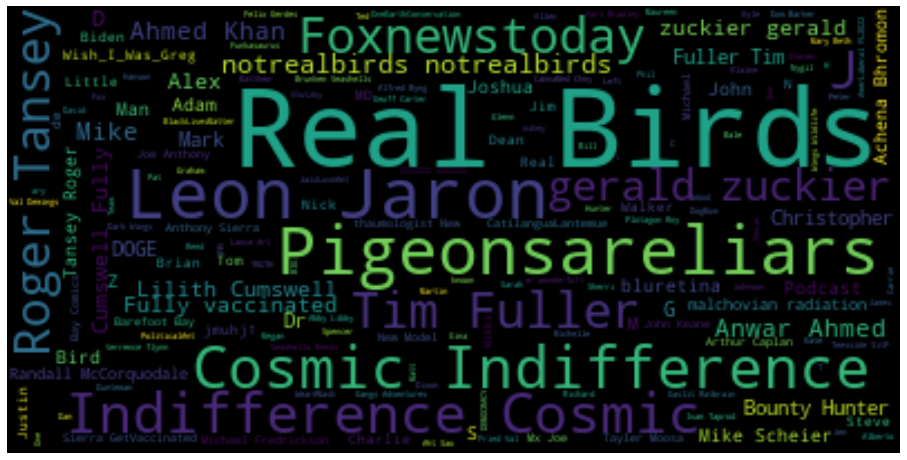

In [5]:
name = ' '. join(n for n in spy.user_name)
plt.figure(figsize=(16,16))
wc = WordCloud().generate(name)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

Just like I assumed most of them would have such like usernames that push their theories

In [6]:
# Next we check their locations
spy.user_location.value_counts()

florida                         17
Ellicott City, MD               12
New Jersey, USA                  9
Connecticut, USA                 9
Southern California              8
                                ..
Brooklyn, NY (11226)             1
Fresbro, CA                      1
Rhode Island                     1
💉 ✊🏿 ❄️ 🇺🇸 ⚾ ✡️  {🎗️🧠💊}          1
Protecting my reset button 😳     1
Name: user_location, Length: 353, dtype: int64

In [7]:
def wc(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["https","t","U","S"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

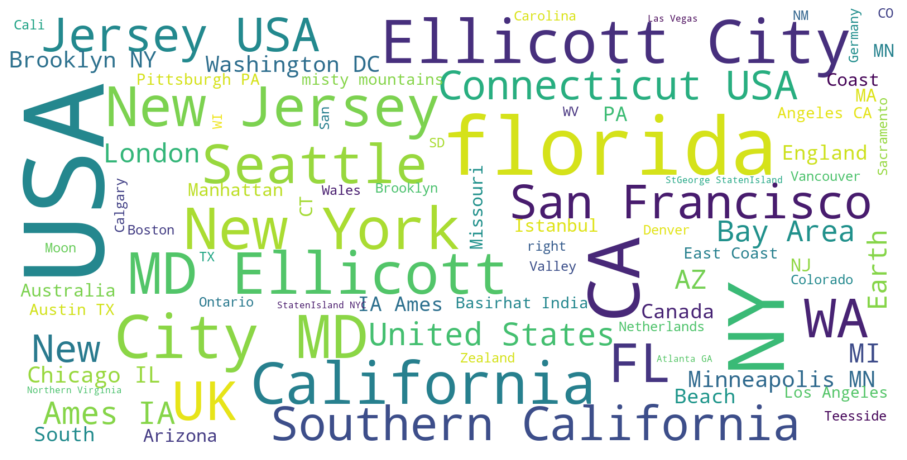

In [8]:
wc(spy['user_location'], title = '', mask=None)

<AxesSubplot:title={'center':' User Location'}, ylabel='user_location'>

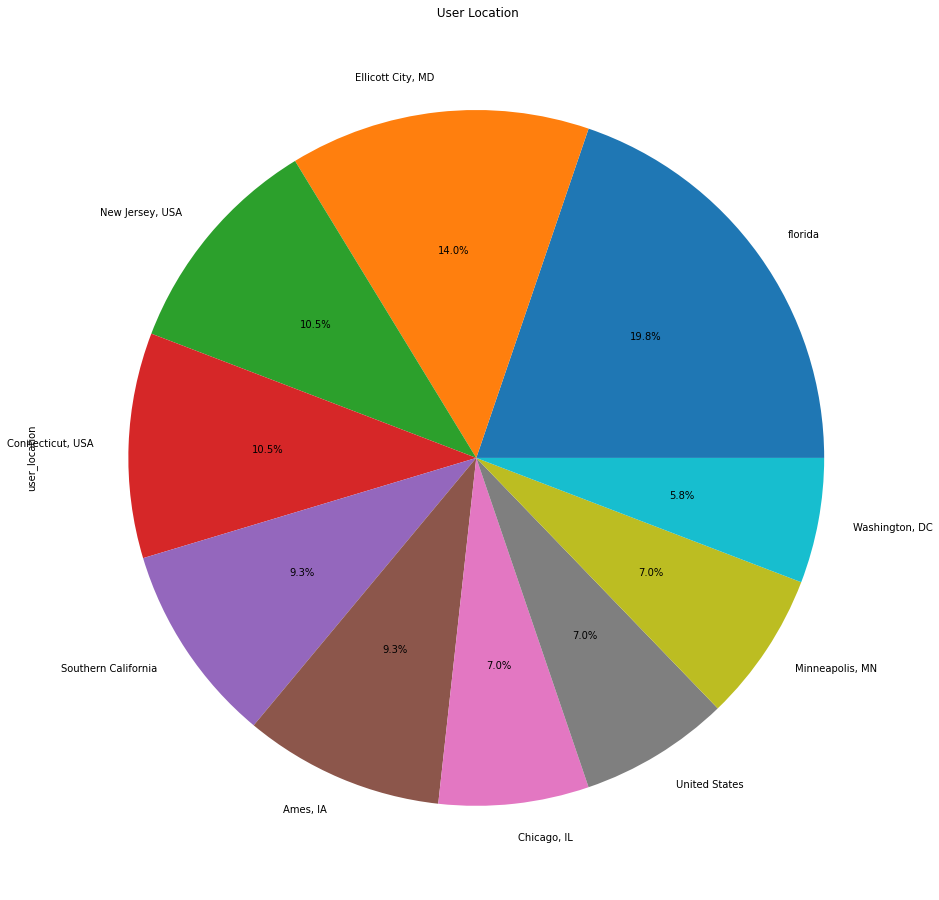

In [9]:
plt.figure(figsize=(16,16))
spy.user_location.value_counts().head(10).plot(kind="pie", title=" User Location", autopct="%1.1f%%")

<AxesSubplot:title={'center':' User Location'}, ylabel='user_location'>

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9994 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127999 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 

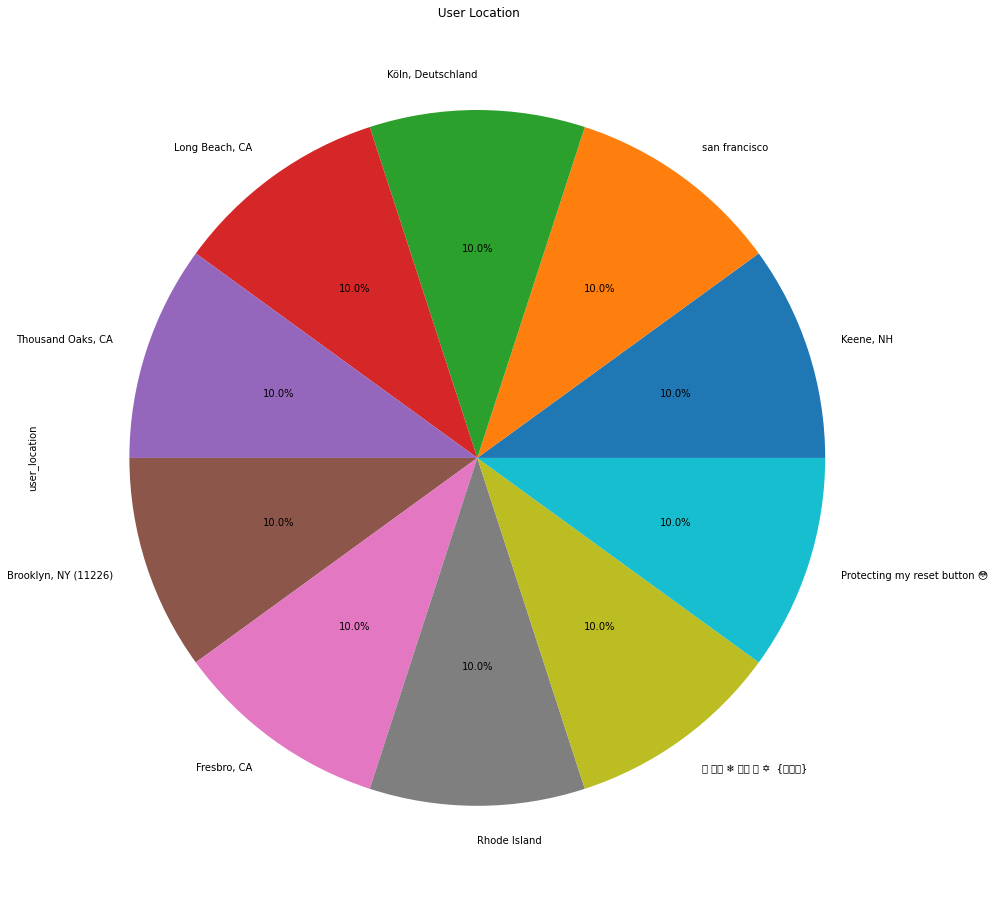

In [10]:
plt.figure(figsize=(16,16))
spy.user_location.value_counts().tail(10).plot(kind="pie", title=" User Location", autopct="%1.1f%%")

In [11]:
spy.loc[spy.user_location=="florida"]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
74,1470867323963994115,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-14 21:24:32,@RealCandaceO @benshapiro Because they know. @...,NaN,Twitter Web App,0,0,False
112,1470565448106356741,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-14 01:24:59,@marcorubio Stop telling lies. Uncover the big...,NaN,Twitter Web App,0,0,False
113,1470559384644337669,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-14 01:00:53,@yaf @benshapiro @realDailyWire The real issue...,NaN,Twitter Web App,0,0,False
125,1470479756374253575,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-13 19:44:28,@TheDailyShow @birdsarentreal daily show shoul...,['birdsarentreal'],Twitter Web App,0,1,False
128,1470445333075345422,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-13 17:27:41,@BrianKempGA @EWErickson @GaLifeAlliance The r...,NaN,Twitter Web App,0,1,False
135,1470420591182233608,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-13 15:49:22,@EWErickson You should care indeed in this @bi...,['birdsarentreal'],Twitter Web App,0,0,False
136,1470420429974261771,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-13 15:48:44,@HotlineJosh @EWErickson The real issue is #bi...,['birdsarentreal'],Twitter Web App,0,0,False
144,1470390523298988041,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-13 13:49:53,@benshapiro Stop distracting us from the real ...,['birdsarentreal'],Twitter Web App,0,0,False
145,1470389286155563009,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-13 13:44:58,@benshapiro You should pay attention on the gr...,['birdsarentreal'],Twitter Web App,0,0,False
149,1470351851505827844,Leon Jaron,florida,"I am not a “well adjusted”, not “legacy Americ...",2012-03-18 12:41:27,102,124,14195,False,2021-12-13 11:16:13,@mattdizwhitlock Also Merrill Garland is ignor...,['birdsarentreal'],Twitter Web App,0,0,False


In [12]:
spy.user_location.isna().sum()

223

# User Description

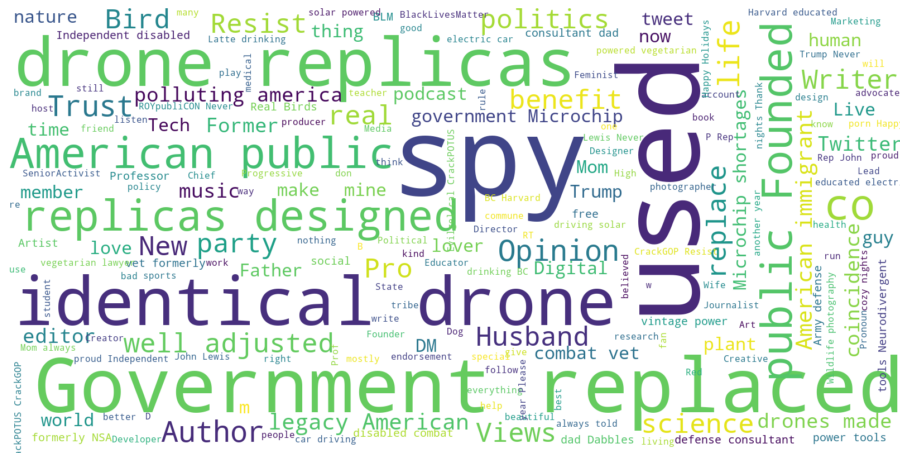

In [13]:
wc(spy['user_description'], title = '', mask=None)

## Tweets

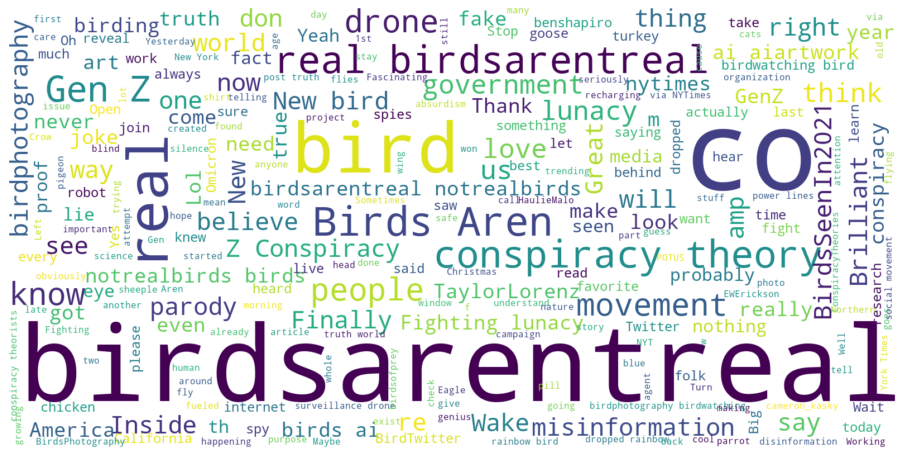

In [14]:
wc(spy['text'], title = '', mask=None)

# Actual Tweets vs Retweets
* This will help us gauge how much attention these posts are getting

<AxesSubplot:ylabel='is_retweet'>

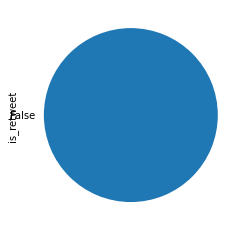

In [15]:
spy.is_retweet.value_counts().plot(kind="pie")

 They are all actual tweets

# Hashtags

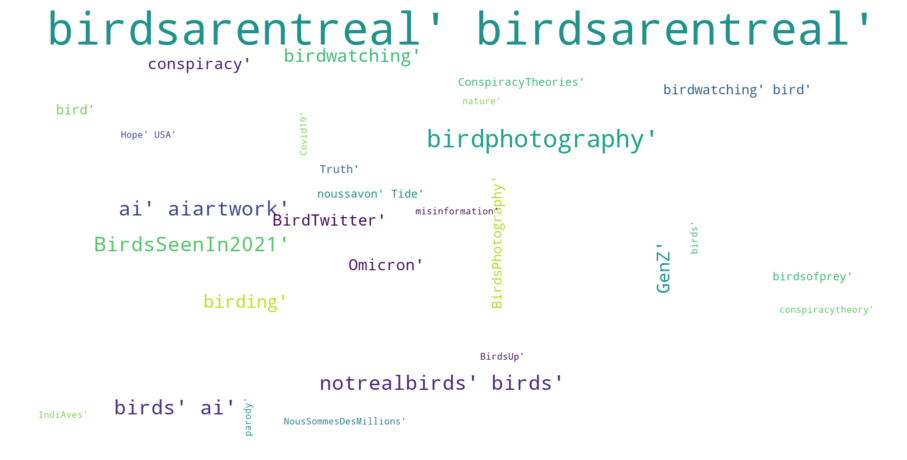

In [16]:
wc(spy['hashtags'], title = '', mask=None)

Let us clean the hashtags

In [17]:
def hashtag(x):
  x = str(x)
  x = x.replace('[','')
  x = x.replace(']','')
  x = x.split(',')
  return x
  
spy['hashtag'] = spy['hashtags'].apply(lambda y : hashtag(y))
spy = spy.explode('hashtag')
spy['hashtag'] = spy['hashtag'].astype(str)
spy['hashtag'] = spy['hashtag'].str.replace("'",'')
spy['hashtag'] = spy['hashtag'].str.replace('"','')

spy['hashtag'] = spy['hashtag'].str.replace(" ",'')
spy= spy[spy['hashtag'] != 'nan']

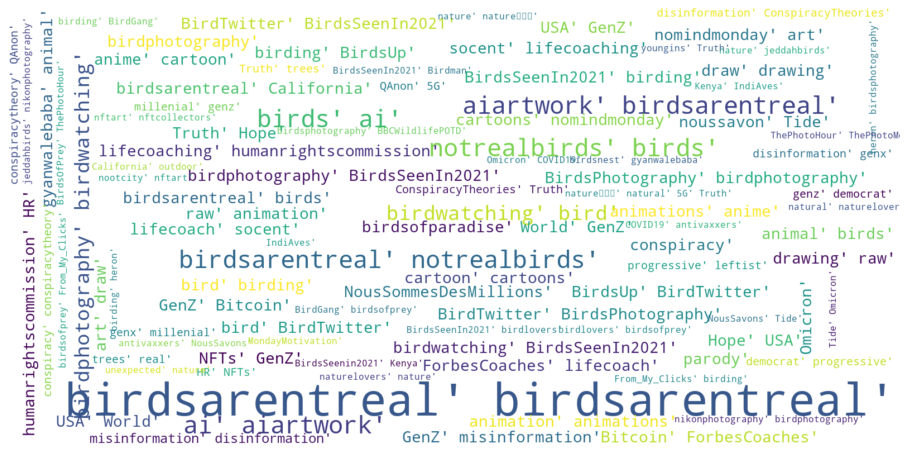

In [18]:
wc(spy['hashtags'], title = '', mask=None)

# Retweets

In [19]:
spy.retweets.value_counts()

0     674
1      91
2      56
3      36
4      31
7      16
5      10
9       7
20      7
6       6
12      1
Name: retweets, dtype: int64

<AxesSubplot:ylabel='retweets'>

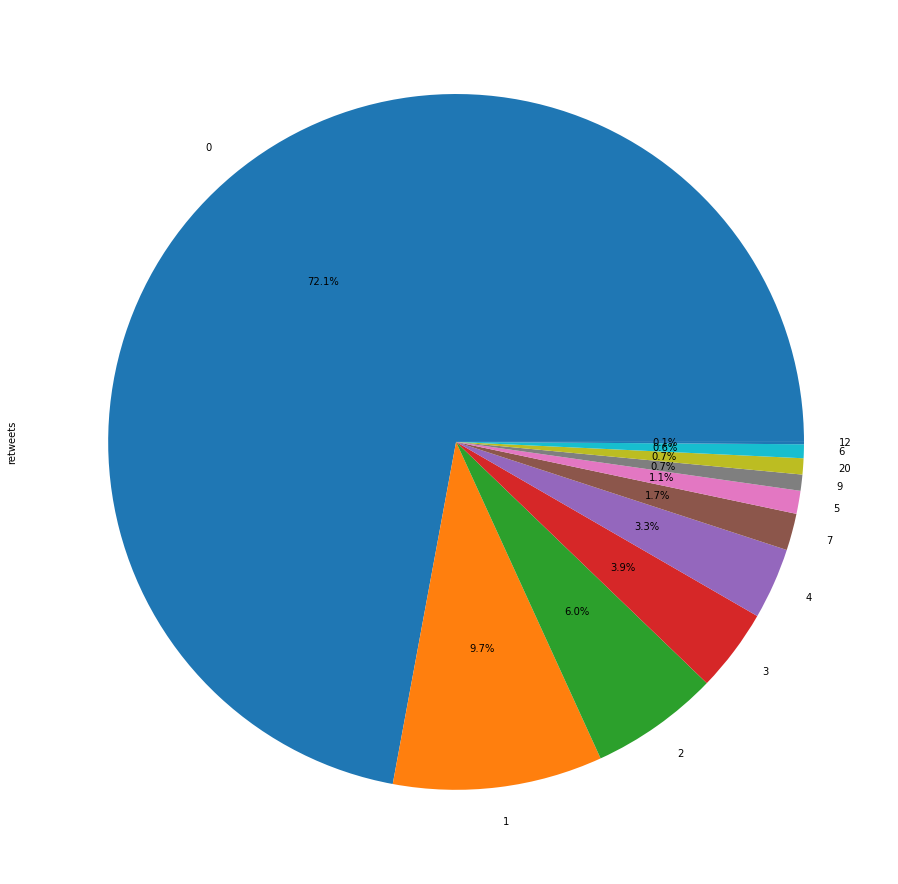

In [20]:
plt.figure(figsize=(16,16))
spy.retweets.value_counts().plot(kind="pie", autopct="%1.1f%%")

# Platform

In [21]:
spy.source.value_counts()

Twitter for iPhone      311
Twitter for Android     257
Twitter Web App         243
artspark.io              60
Twitter for iPad         22
Streamlabs Twitter       10
Buffer                   10
Hootsuite Inc.            5
LinkedIn                  4
Tweetbot for iΟS          3
Libsyn On-Publish         2
Echofon                   2
eClincher                 2
TweetDeck                 2
Twitterrific for Mac      1
Instagram                 1
Name: source, dtype: int64

<AxesSubplot:>

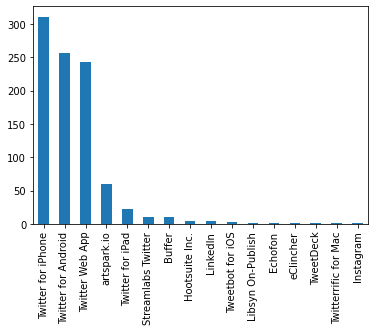

In [22]:
spy.source.value_counts().plot(kind="bar")

# Followers

In [23]:
spy.user_followers.value_counts()

3       68
6       49
50      35
9       25
322     21
        ..
45       1
391      1
393      1
396      1
1023     1
Name: user_followers, Length: 354, dtype: int64

<AxesSubplot:>

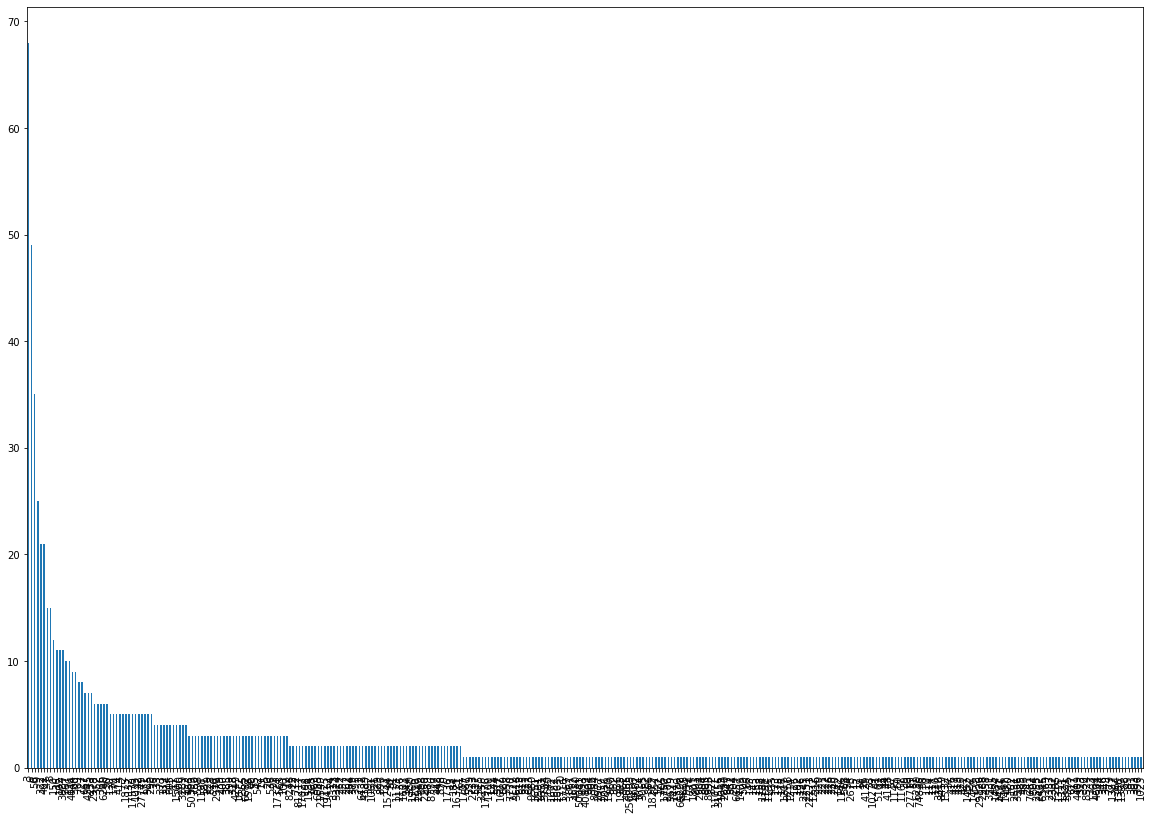

In [24]:
plt.figure(figsize=(20,14))
spy.user_followers.value_counts().plot(kind="bar")

In [25]:
# Over 10000 followers
spy.loc[spy.user_followers>=10000]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hashtag
56,1469428595672113154,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-10 22:07:32,@WhatsTrending @iammaddisonhill Wake up americ...,['birsdarentreal'],Twitter for iPhone,0,0,False,birsdarentreal
82,1470809059402125313,TWiT Tech Podcasts,"Petaluma, CA","Tech podcasts with @leolaporte, @jasonhowell, ...",2009-08-10 20:39:18,81217,528,9275,True,2021-12-14 17:33:00,From #Assange’s extradition to the Gen Z consp...,"['Assange', 'birdsarentreal']",eClincher,5,10,False,Assange
82,1470809059402125313,TWiT Tech Podcasts,"Petaluma, CA","Tech podcasts with @leolaporte, @jasonhowell, ...",2009-08-10 20:39:18,81217,528,9275,True,2021-12-14 17:33:00,From #Assange’s extradition to the Gen Z consp...,"['Assange', 'birdsarentreal']",eClincher,5,10,False,birdsarentreal
110,1470574436625563648,Justin Powell,"Morris County NJ, USA","Senior Manager, Digital Marketing & Technology...",2009-03-05 03:30:38,17570,18033,3841,False,2021-12-14 02:00:42,.@CNBC: #Parody conspiracy theorists swear #b...,"['Parody', 'birds', 'birdsarentreal', 'politic...",Hootsuite Inc.,0,0,False,Parody
110,1470574436625563648,Justin Powell,"Morris County NJ, USA","Senior Manager, Digital Marketing & Technology...",2009-03-05 03:30:38,17570,18033,3841,False,2021-12-14 02:00:42,.@CNBC: #Parody conspiracy theorists swear #b...,"['Parody', 'birds', 'birdsarentreal', 'politic...",Hootsuite Inc.,0,0,False,birds
110,1470574436625563648,Justin Powell,"Morris County NJ, USA","Senior Manager, Digital Marketing & Technology...",2009-03-05 03:30:38,17570,18033,3841,False,2021-12-14 02:00:42,.@CNBC: #Parody conspiracy theorists swear #b...,"['Parody', 'birds', 'birdsarentreal', 'politic...",Hootsuite Inc.,0,0,False,birdsarentreal
110,1470574436625563648,Justin Powell,"Morris County NJ, USA","Senior Manager, Digital Marketing & Technology...",2009-03-05 03:30:38,17570,18033,3841,False,2021-12-14 02:00:42,.@CNBC: #Parody conspiracy theorists swear #b...,"['Parody', 'birds', 'birdsarentreal', 'politic...",Hootsuite Inc.,0,0,False,politics
110,1470574436625563648,Justin Powell,"Morris County NJ, USA","Senior Manager, Digital Marketing & Technology...",2009-03-05 03:30:38,17570,18033,3841,False,2021-12-14 02:00:42,.@CNBC: #Parody conspiracy theorists swear #b...,"['Parody', 'birds', 'birdsarentreal', 'politic...",Hootsuite Inc.,0,0,False,conspiracytheory
132,1470434128600662016,#RejoinEU ⭐️ #WeAreTheOppositionNow 🇪🇺💙🕷,UK + USA / Global,Don’t blame me I voted Remain Politically home...,2013-03-05 01:57:41,29126,30198,334624,False,2021-12-13 16:43:10,"#BirdsArentReal \n\nBirds Aren’t Real, or Are ...",['BirdsArentReal'],Twitter for iPhone,0,0,False,BirdsArentReal
133,1470431719471796226,Cookie Ogg,San Diego and Reno,"Animal lover, adventure lover, fun lover. It's...",2012-09-23 19:10:07,16321,17010,63986,False,2021-12-13 16:33:35,@vuds5 #RussianVids11 Did you know that #Birds...,"['RussianVids11', 'BirdsArentReal']",Twitter Web App,1,1,False,RussianVids11


<AxesSubplot:>

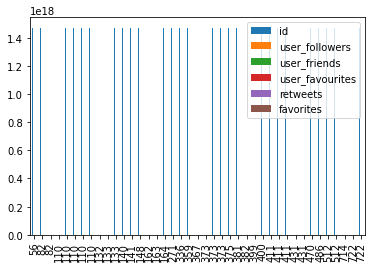

In [26]:
spy.loc[spy.user_followers>=10000].plot(kind="bar")

<AxesSubplot:ylabel='user_followers'>

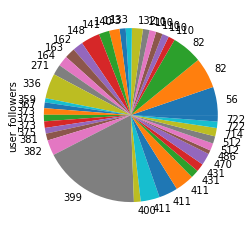

In [27]:
many=spy.loc[spy.user_followers>=10000]
many.user_followers.plot(kind="pie")

# Verified

In [28]:
spy.user_verified.value_counts()

False    909
True      26
Name: user_verified, dtype: int64

<AxesSubplot:>

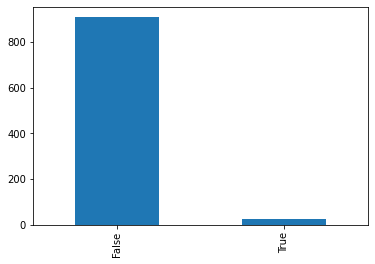

In [29]:
spy.user_verified.value_counts().plot(kind="bar")

In [30]:
spy[spy.user_verified==True]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hashtag
82,1470809059402125313,TWiT Tech Podcasts,"Petaluma, CA","Tech podcasts with @leolaporte, @jasonhowell, ...",2009-08-10 20:39:18,81217,528,9275,True,2021-12-14 17:33:00,From #Assange’s extradition to the Gen Z consp...,"['Assange', 'birdsarentreal']",eClincher,5,10,False,Assange
82,1470809059402125313,TWiT Tech Podcasts,"Petaluma, CA","Tech podcasts with @leolaporte, @jasonhowell, ...",2009-08-10 20:39:18,81217,528,9275,True,2021-12-14 17:33:00,From #Assange’s extradition to the Gen Z consp...,"['Assange', 'birdsarentreal']",eClincher,5,10,False,birdsarentreal
148,1470364885716545543,@Richi 😷 Jennings,"Sherfield on Loddon, England",Foolish #analyst #editor: @TechstrongGroup @Se...,2007-03-21 11:33:58,50041,5643,92699,True,2021-12-13 12:08:01,"@PatchouliW oh, and #BirdsArentReal",['BirdsArentReal'],Twitter Web App,0,0,False,BirdsArentReal
248,1469822998542979075,William Mallard,Tokyo,"Tokyo-based editor @Reuters. Ex-@AJC, Kyodo, D...",2010-02-23 23:55:32,3556,3765,141,True,2021-12-12 00:14:45,“It basically became an experiment in misinfor...,['BirdsArentReal'],Twitter for iPhone,3,2,False,BirdsArentReal
258,1469774059093254149,Shawn S. Lealos,"Edmond, OK",Author of 'Dollar Deal: The Stephen King Dolla...,2013-05-29 20:28:42,536,441,3853,True,2021-12-11 21:00:17,"LOL!!! (they are in on the joke, btw) #ThePig...","['ThePigeonLies', 'birdsarentreal']",Twitter Web App,0,0,False,ThePigeonLies
258,1469774059093254149,Shawn S. Lealos,"Edmond, OK",Author of 'Dollar Deal: The Stephen King Dolla...,2013-05-29 20:28:42,536,441,3853,True,2021-12-11 21:00:17,"LOL!!! (they are in on the joke, btw) #ThePig...","['ThePigeonLies', 'birdsarentreal']",Twitter Web App,0,0,False,birdsarentreal
290,1469697009854468096,Melanie Z Kilpatrick,Victoria,"Communicator, eternal optimist, mom who loves ...",2009-03-13 02:49:39,1750,3373,7532,True,2021-12-11 15:54:07,"Fighting misinformation with misinformation, t...",['birdsarentreal'],Twitter for iPhone,0,0,False,birdsarentreal
305,1469648137878917127,Dr Kate Mulligan,"Toronto, Ontario","I like neighbourhoods, social Rx, nature, poli...",2017-05-01 16:44:10,8084,6928,5500,True,2021-12-11 12:39:55,finally it all makes sense. #birdsarentreal ht...,['birdsarentreal'],Twitter Web App,2,10,False,birdsarentreal
333,1469454320777129985,Michael Ordoña,Ishtar,"Movies, TV, Niners, Giants, Warriors and puns....",2014-01-09 00:10:01,774,1105,41064,True,2021-12-10 23:49:45,@natalia13reagan Yeah? That Geospiza parvula o...,['birdsarentreal'],Twitter Web App,0,1,False,birdsarentreal
382,1469396881444794369,Adam Nash,Silicon Valley,CEO & Co-Founder @DaffyGiving. Helping people ...,2007-03-18 15:35:01,40839,2177,18161,True,2021-12-10 20:01:31,Birds aren't real. #birdsarentreal 🐦\n\nhttps:...,['birdsarentreal'],Twitter Web App,1,3,False,birdsarentreal


In [32]:
minus_duplicate[minus_duplicate.user_verified==True]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
82,1470809059402125313,TWiT Tech Podcasts,"Petaluma, CA","Tech podcasts with @leolaporte, @jasonhowell, ...",2009-08-10 20:39:18,81217,528,9275,True,2021-12-14 17:33:00,From #Assange’s extradition to the Gen Z consp...,"['Assange', 'birdsarentreal']",eClincher,5,10,False
85,1470802090574422022,Arthur Caplan,NY NY,"Professor, medical ethics, NYU Grossman Schoo...",2008-11-23 14:46:10,16598,3333,37958,True,2021-12-14 17:05:19,"'Magic dirt': How the internet fueled, and def...",NaN,Twitter Web App,0,1,False
121,1470514499459301381,Dr. Jonathan N. Stea,"Calgary, Alberta",🇨🇦 Clinical Psychologist. Adjunct Assistant Pr...,2009-06-25 04:15:38,14846,201,156431,True,2021-12-13 22:02:32,@CaulfieldTim @drkiki @Lauraldawn @crackedscie...,NaN,Twitter Web App,0,5,False
122,1470513799916523521,Timothy Caulfield,Edmonton Canada,"Professor of health law & science policy, spea...",2011-11-08 01:11:32,74606,4425,12866,True,2021-12-13 21:59:45,@drkiki @Lauraldawn @crackedscience @jonathans...,NaN,Twitter Web App,0,5,False
148,1470364885716545543,@Richi 😷 Jennings,"Sherfield on Loddon, England",Foolish #analyst #editor: @TechstrongGroup @Se...,2007-03-21 11:33:58,50041,5643,92699,True,2021-12-13 12:08:01,"@PatchouliW oh, and #BirdsArentReal",['BirdsArentReal'],Twitter Web App,0,0,False
201,1470070082009243657,Viktor Giacobbo,Switzerland,Staatskomiker. Nehme aber auch Pointengeld von...,2009-07-04 12:51:39,203037,1476,12000,True,2021-12-12 16:36:34,"""A parody social movement with a purpose. It’s...",NaN,Twitter Web App,4,23,False
248,1469822998542979075,William Mallard,Tokyo,"Tokyo-based editor @Reuters. Ex-@AJC, Kyodo, D...",2010-02-23 23:55:32,3556,3765,141,True,2021-12-12 00:14:45,“It basically became an experiment in misinfor...,['BirdsArentReal'],Twitter for iPhone,3,2,False
258,1469774059093254149,Shawn S. Lealos,"Edmond, OK",Author of 'Dollar Deal: The Stephen King Dolla...,2013-05-29 20:28:42,536,441,3853,True,2021-12-11 21:00:17,"LOL!!! (they are in on the joke, btw) #ThePig...","['ThePigeonLies', 'birdsarentreal']",Twitter Web App,0,0,False
265,1469756093178040321,The Yes Men,This is a location,Help the Yes Men keep doing our thing: https:/...,2009-01-31 18:51:57,32939,1752,6002,True,2021-12-11 19:48:54,"Best project ever, and best reveal. ""Yes, we h...",NaN,Twitter for Android,14,37,False
290,1469697009854468096,Melanie Z Kilpatrick,Victoria,"Communicator, eternal optimist, mom who loves ...",2009-03-13 02:49:39,1750,3373,7532,True,2021-12-11 15:54:07,"Fighting misinformation with misinformation, t...",['birdsarentreal'],Twitter for iPhone,0,0,False
